In [1]:
import torch 
from torch import nn

# import torchvision
import torchvision 
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch version: 2.1.1+cu121
torchvision version: 0.16.1+cu121


In [2]:
train_data = datasets.FashionMNIST(
    root = "data" , 
    train=True ,
    download=True , 
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False , 
    download=True , 
    transform = ToTensor()
)


In [3]:
image , label = train_data[0]
image.shape , label

(torch.Size([1, 28, 28]), 9)

image shape `[1, 28, 28]` -> [`color_channel`=1 ,`height`=28, `width`=28 ]

In [4]:
# how many samples are there ?
len(train_data.data) , len(test_data.data) , len(train_data.targets) , len(test_data.targets)

(60000, 10000, 60000, 10000)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Visualize data

Image shape : torch.Size([1, 28, 28])


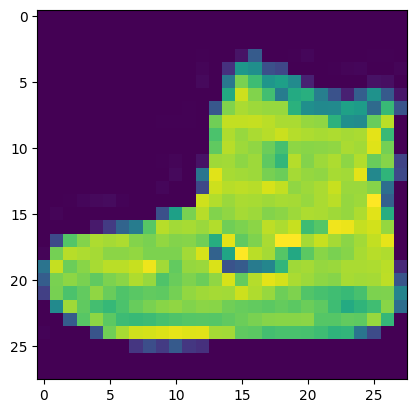

In [6]:
import matplotlib.pyplot as plt
image , label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.reshape(28,28,1))

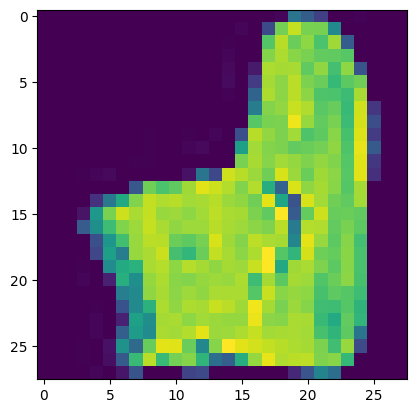

In [7]:
plt.imshow(image.permute(2,1,0))

In [8]:
import numpy as np
x = np.arange(1,10).reshape(3,3,1)
x


array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]],

       [[7],
        [8],
        [9]]])

In [9]:
x = x.reshape(1,3,3)
x

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [10]:
x.reshape(3,3,1)

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]],

       [[7],
        [8],
        [9]]])

In [11]:
x.transpose(2,1,0)

array([[[1],
        [4],
        [7]],

       [[2],
        [5],
        [8]],

       [[3],
        [6],
        [9]]])

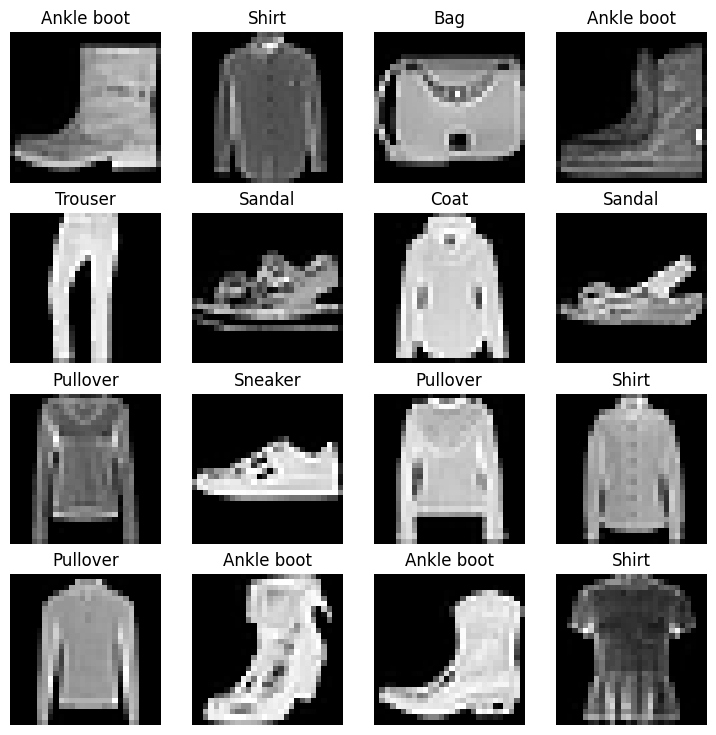

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [13]:
len(train_data)

60000

In [15]:
train_data_x = [["image1","Label1"],["image2","Label2"],["image3" , "Label3"],["image4" , "Label4"]]
next(iter(train_data_x))

['image1', 'Label1']

## Undersatand `DataLoader`

In [16]:
from torch.utils.data import DataLoader

# Setup the batch size htperparameter
BATCH_SIZE = 2

# Turn dataset into iterables (batches)
train_dataloader = DataLoader(train_data_x , # Dataset to convert to iterabel 
                             batch_size=BATCH_SIZE, # How many samples per batches
                             shuffle=True # Shuffle data every epoch ?
                             )

In [25]:
for i in train_dataloader:
    print(i)

[('image3', 'image2'), ('Label3', 'Label2')]
[('image4', 'image1'), ('Label4', 'Label1')]


In [26]:
BATCH_SIZE = 32 

# Turn dataset into iterables (batches)
train_dataloader = DataLoader(train_data ,
                            batch_size=BATCH_SIZE,
                            shuffle=True
                            )

# Turn dataset into iterables (batches)
test_dataloader = DataLoader(test_data ,
                            batch_size=BATCH_SIZE,
                            shuffle=True
                            )

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f2874106e30>, <torch.utils.data.dataloader.DataLoader object at 0x7f2874107d90>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [27]:
# check inside the dataloader 
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

# 3. Model 0 : Build a baseline model

In [79]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape , hidden_units , output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape , hidden_units),
            nn.Linear(hidden_units , output_shape)
        )

    def forward(self , x):
        return nn.Softmax()(self.layer_stack(x))

In [80]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784 , # one for every pixel (28 * 28)
                             hidden_units=10, # how many units in the hidden layer
                             output_shape=len(class_names)) # one for every class

model_0.to("cpu") # keep model on CPU to begin 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [81]:
for layer in model_0.parameters():
    print(layer)
    layer = 0

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)
Parameter containing:
tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
         0.0018,  0.0163], requires_grad=True)
Parameter containing:
tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
          0.2019,  0.2847],
        [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,
          0.0932, -0.1864],
        [ 0.2488,  0.1500,  0.1907,  0.1457, -0.3050, -0.0580,  0.1643,  0.1565,
         -0.2877, -0.1792],
        [ 0.2305, -

## setup loss , optimizer , and evaluation metrics

In [82]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [83]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters() , lr = 0.1)

In [84]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [144]:
# Number of batches
len(train_dataloader)

1875

### Creating a training loop and test loop on the batches of the data

In [101]:
# from tdqm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3


for epoch in range(epochs):
    ### Train model
    model_0.train()
    train_loss = 0
    train_acc = 0
    for batch , (X , y) in enumerate(train_dataloader):
        # Forward on the model
        y_logits = model_0(X)
        # print(y_logits.shape)
        # Calculate preds
        y_pred = y_logits.argmax(axis=1)
        # print(y_pred.shape , y.shape)
        # Calculate accuracy
        train_acc += accuracy_fn(y , y_pred)
        # calculate loss 
        loss = loss_fn(y_logits , y)
        train_loss += loss
        # Optmizer zero grad
        optimizer.zero_grad()
        # Loss backward
        loss.backward()
        # optmizer step
        optimizer.step()
        if batch % 400 == 0:
            print(f"Look at {len(X) * batch} / {len(train_data)} samples")

    train_loss = train_loss / len(train_dataloader)
    train_acc =  train_acc / len(train_dataloader)
    print(f"Epoch {epoch} | Train Loss : {train_loss:.5f} | Train acc : {train_acc:.5f}")
    ### Test Model
    model_0.eval()
    test_loss = 0 
    test_acc = 0
    
    for batch , (X , y) in enumerate(test_dataloader):
        # Forward pass
        with torch.inference_mode() :
            y_logits = model_0(X)
            # calculate preds
            y_pred = y_logits.argmax(axis=1)
            # Loss 
            loss = loss_fn(y_logits , y)
            test_loss += loss
            # Accuracy
            test_acc += accuracy_fn(y_pred, y)

        test_loss = test_loss / len(test_dataloader)
        test_acc = test_acc / len(test_dataloader)
    print(f"Epoch {epoch} | Test Loss : {test_loss:.5f} | Test acc : {test_acc:.5f}")   

train_time_end_on_cpu = timer()
total_train_time_model = print_train_time(start = train_time_start_on_cpu , 
                                         end = train_time_end_on_cpu , 
                                         device = "CPU")

Look at 0 / 60000 samples
Look at 12800 / 60000 samples
Look at 25600 / 60000 samples
Look at 38400 / 60000 samples
Look at 51200 / 60000 samples
Epoch 0 | Train Loss : 1.66255 | Train acc : 80.06500
Epoch 0 | Test Loss : 0.00550 | Test acc : 0.24048
Look at 0 / 60000 samples
Look at 12800 / 60000 samples
Look at 25600 / 60000 samples
Look at 38400 / 60000 samples
Look at 51200 / 60000 samples
Epoch 1 | Train Loss : 1.66165 | Train acc : 80.17000
Epoch 1 | Test Loss : 0.00533 | Test acc : 0.26029
Look at 0 / 60000 samples
Look at 12800 / 60000 samples
Look at 25600 / 60000 samples
Look at 38400 / 60000 samples
Look at 51200 / 60000 samples
Epoch 2 | Train Loss : 1.66080 | Train acc : 80.27333
Epoch 2 | Test Loss : 0.00546 | Test acc : 0.24048
Train time on CPU: 11.817 seconds


### Make prediction 

In [172]:
def eval_model(model : torch.nn.Module , 
              dataloader : torch.utils.data.DataLoader , 
              loss_fn , 
              acc_fn,
              device = device):
    """
    returns a dictionary contains models evaluations
    """
    loss = 0 
    acc = 0 
    model.eval()
    with torch.inference_mode():
        for X , y in dataloader :
            X , y = X.to(device) , y.to(device)
            # Make predictions
            pred_probs = model(X)
            # caculate loss
            loss += loss_fn(pred_probs , y)
            # Claculate accuracy
            acc +=acc_fn(y , pred_probs.argmax(axis=1))

        loss /= len(dataloader)
        acc /= len(dataloader)
    return {"Loss" : loss.item() , 
           "accuracy" : acc}


In [173]:
model_0_results = eval_model(model_0 , test_dataloader , loss_fn , accuracy_fn ,device = "cpu")
model_0_results

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


{'Loss': 1.6711710691452026, 'accuracy': 79.02356230031948}

## Setup code agnostic-code 

In [174]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model 1: Building a better model with non-linearity 

In [182]:
class FashionMNISTModelV1(torch.nn.Module):
    def __init__(self , input_shape : int , hidden_units : int , output_shape):
        super().__init__()
        self.Flatten = nn.Flatten()
        self.l1 = nn.Linear(input_shape , hidden_units)
        self.l2 = nn.Linear(hidden_units , output_shape)
        self.Relu = nn.ReLU()

    def forward(self , x):
        x = self.Flatten(x)
        x = self.l1(x)
        x = self.Relu(x)
        x = self.l2(x)
        # x = self.Relu(x)
        return x

In [183]:
model_1 = FashionMNISTModelV1(784 , 10 , len(class_names)).to(device)
# Check model device
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0034, -0.0353,  0.0323,  ..., -0.0218, -0.0176,  0.0069],
        [ 0.0097,  0.0137,  0.0196,  ..., -0.0238,  0.0124, -0.0214],
        [-0.0112, -0.0170, -0.0243,  ...,  0.0066, -0.0149, -0.0091],
        ...,
        [-0.0231,  0.0100,  0.0303,  ...,  0.0048, -0.0134, -0.0141],
        [-0.0112,  0.0124,  0.0062,  ...,  0.0035, -0.0279,  0.0321],
        [ 0.0080,  0.0258,  0.0155,  ..., -0.0284, -0.0354, -0.0013]],
       device='cuda:0', requires_grad=True)

## Setup loss , optimizer , evalution metrics

In [184]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters() , lr = 0.1)

In [185]:
def train_step(model: torch.nn.Module 
               ,data_loader: torch.utils.data.DataLoader
              ,loss_fn: torch.nn.Module
              , optimizer: torch.optim
              ,acc_fn
              ,device : torch.device = device):
    model.train()
    
    ### TRAINING
    Loss = 0
    acc = 0
    for batch , (X , y) in enumerate(data_loader):
        # Send data to Gpu
        X , y = X.to(device) , y.to(device)
        # Forward pass
        pred_probs = model(X)
        # Pred class
        y_pred = pred_probs.argmax(axis=1)
        acc += accuracy_fn(y_pred , y)
        # loss
        loss = loss_fn(pred_probs , y)
        Loss += loss
        # Optim zero
        optimizer.zero_grad()
        # loss backward
        loss.backward()
        # optim step
        optimizer.step()
        if batch % 400 == 0:
            print(f"Look at {batch * len(data_loader)} / {len(data_loader.dataset)} samples...")
    Loss /= len(data_loader)
    acc /= len(data_loader)
    print(f"Train --- > Loss : {Loss:.5f} | accuracy : {acc:5f}")

def test_step(dataloader : torch.utils.data.DataLoader , 
             model : torch.nn.Module, 
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    test_loss , test_acc = 0 , 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X , y in dataloader:
            X , y = X.to(device) , y.to(device)
            # forward
            y_prob = model(X)
            # Prediction
            y_pred = y_prob.argmax(axis=1)
            # loss
            test_loss += loss_fn(y_prob , y_pred)
            test_acc += accuracy_fn(y_pred , y)

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    print(f"Test --- > Loss : {test_loss:.5f} |  accuracy {test_acc:.5f}")

In [186]:
# set manual seed
torch.manual_seed(42)
epochs = 3
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
for epoch in range(epochs):
    print(f"****Epoch : {epoch}")
    ### Training
    train_step(data_loader=train_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              optimizer=optimizer,
              acc_fn=accuracy_fn,
              )
    ### Test
    test_step(dataloader=test_dataloader,model=model_1,loss_fn=loss_fn , accuracy_fn=accuracy_fn)

train_time_stop_on_gpu = timer()
total_train_time_model1 = print_train_time(start = train_time_start_on_gpu , 
                      end=train_time_stop_on_gpu,
                      device = "GPU")

****Epoch : 0
Look at 0 / 60000 samples...
Look at 750000 / 60000 samples...
Look at 1500000 / 60000 samples...
Look at 2250000 / 60000 samples...
Look at 3000000 / 60000 samples...
Train --- > Loss : 0.61899 | accuracy : 77.791667
Test --- > Loss : 0.22686 |  accuracy 82.50799
****Epoch : 1
Look at 0 / 60000 samples...
Look at 750000 / 60000 samples...
Look at 1500000 / 60000 samples...
Look at 2250000 / 60000 samples...
Look at 3000000 / 60000 samples...
Train --- > Loss : 0.46963 | accuracy : 83.110000
Test --- > Loss : 0.20245 |  accuracy 81.40974
****Epoch : 2
Look at 0 / 60000 samples...
Look at 750000 / 60000 samples...
Look at 1500000 / 60000 samples...
Look at 2250000 / 60000 samples...
Look at 3000000 / 60000 samples...
Train --- > Loss : 0.44308 | accuracy : 84.053333
Test --- > Loss : 0.22870 |  accuracy 81.93890
Train time on GPU: 12.698 seconds


In [187]:
model_1_results = eval_model(model_1,test_dataloader , loss_fn , accuracy_fn , device=device)
model_1_results

{'Loss': 0.5260878205299377, 'accuracy': 81.96884984025559}

In [188]:
model_0_results

{'Loss': 1.6711710691452026, 'accuracy': 79.02356230031948}